# Assignment 2

# <font color='red'> Conceptual Questions</font>

## <font color='red'> T/F Question: </font> Bagging reduces both the variance and bias of decision trees by averaging multiple pruned trees trained on bootstrapped datasets. [10 pts]

Answer: False. Bagging primarily reduces variance, not bias. Decision trees already have low bias and high variance, and Bagging helps stabilize them through averaging, but it doesn’t reduce bias significantly.

## <font color='red'> T/F Question: </font> Random Forest improves upon Bagging by decorrelating the trees through randomly selecting a subset of predictors at each split. [10 pts]

Answer: True. Random Forest enhances Bagging by reducing correlation between trees. It does this by randomly selecting a subset of features (predictors) at each split, which decorrelates the trees and leads to better generalization.

## <font color='red'> T/F Question: </font> In gradient boosting, all trees are trained independently in parallel to speed up the learning process. [10 pts]

Answer: False. In gradient boosting, trees are trained sequentially, not in parallel. Each tree corrects the errors of the previous one, making the process inherently sequential and dependent.

## <font color='red'> T/F Question: </font> Principal Component Analysis (PCA) reduces dimensionality by projecting data onto a lower-dimensional space that best preserves the variance in the original data. [10 pts]


Answer: True. PCA finds orthogonal directions (principal components) that capture the maximum variance in the data and projects the data onto a smaller number of these components to reduce dimensionality.

# <font color='red'> Practice Problems:</font> Complete the tasks below.

Capital Bikeshare Station Management

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets as ds

### Read data from drive or local

In [2]:
# Reading the file directly from local
# from google.colab import drive

# # Mount Google Drive
# drive.mount('/content/drive')

In [3]:
import pandas as pd
# Read csv files

df_Feb = pd.read_csv('202402-capitalbikeshare-tripdata.csv') # Updated path to read file from local
df_Mar = pd.read_csv('202403-capitalbikeshare-tripdata.csv') # Updated path to read file from local
df_Apr = pd.read_csv('202404-capitalbikeshare-tripdata.csv') # Updated path to read file from local

# concat data
df=pd.concat([df_Feb, df_Mar,df_Apr])

In [4]:
# Get unique start station names and their corresponding latitude and longitude
Stations = df[['start_station_name', 'start_lat', 'start_lng']].drop_duplicates()

# Group by 'start_station_name' and keep only the first row of each group
Stations = Stations.groupby('start_station_name').first().reset_index()

# Rename columns
Stations = Stations.rename(columns={'start_lat': 'Latitude', 'start_lng': 'Longitude'})

# Display the result
Stations.head()


,start_station_name,Latitude,Longitude
0,10th & E St NW,38.895924,-77.026147
1,10th & G St NW,38.898243,-77.026235
2,10th & H St NE,38.899998,-76.992690
3,10th & K St NW,38.902521,-77.026312
4,10th & Monroe St NE,38.932449,-76.993457


## <font color="red"> Task 1: </font>	Visualize all station locations origins. [10 pts]
[Map layer is not required.]

Answer:

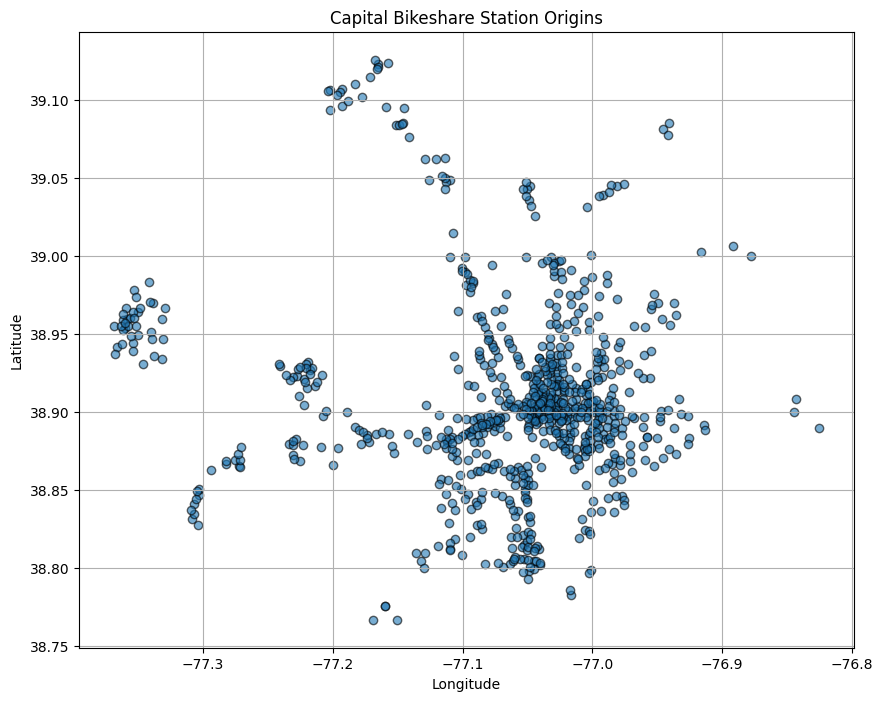

In [5]:
import matplotlib.pyplot as plt

# Task 1: Visualize all station origin locations
plt.figure(figsize=(10, 8))
plt.scatter(Stations['Longitude'], Stations['Latitude'], alpha=0.6, edgecolors='k')
plt.title('Capital Bikeshare Station Origins')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

## The bike sharing operator needs to send out crew with each managing a cluster of some bike stations (for daily operations such as bike repositioning, docking, and repair).

## <font color="red"> Task 2: </font> 	Simply use k-means clustering to cluster all bike docking stations for k value from 2 to 50 and plot the curve for within-cluster sum of squares (WSS) vs k. Discuss your choice of the number of crew, say $k^*$, based on the curve. (We will use this $k^*$ value throughout the following questions.) [10 pts]

Answer:

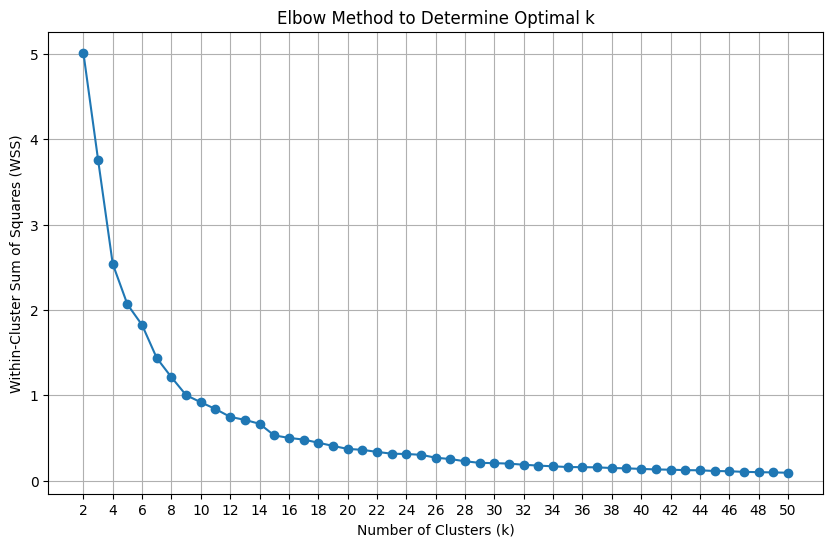

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings

# Suppress memory leak warning from sklearn KMeans (specific to MKL on Windows)
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.cluster._kmeans')

# Prepare data: Latitude and Longitude of stations
X = Stations[['Latitude', 'Longitude']].values

# Store within-cluster sum of squares (WSS)
wss = []

# Range of k values to test
k_values = range(2, 51)

# Loop through k values and calculate WSS
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    wss.append(kmeans.inertia_)

# Plot the WSS vs k curve (Elbow Plot)
plt.figure(figsize=(10, 6))
plt.plot(k_values, wss, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.xticks(np.arange(2, 51, 2))
plt.grid(True)
plt.show()

## <font color="red"> Task 3: </font>  Given your choice of optimal k*. Visualize the clusters of stations from k-means clustering. [10 pts]

Answer:

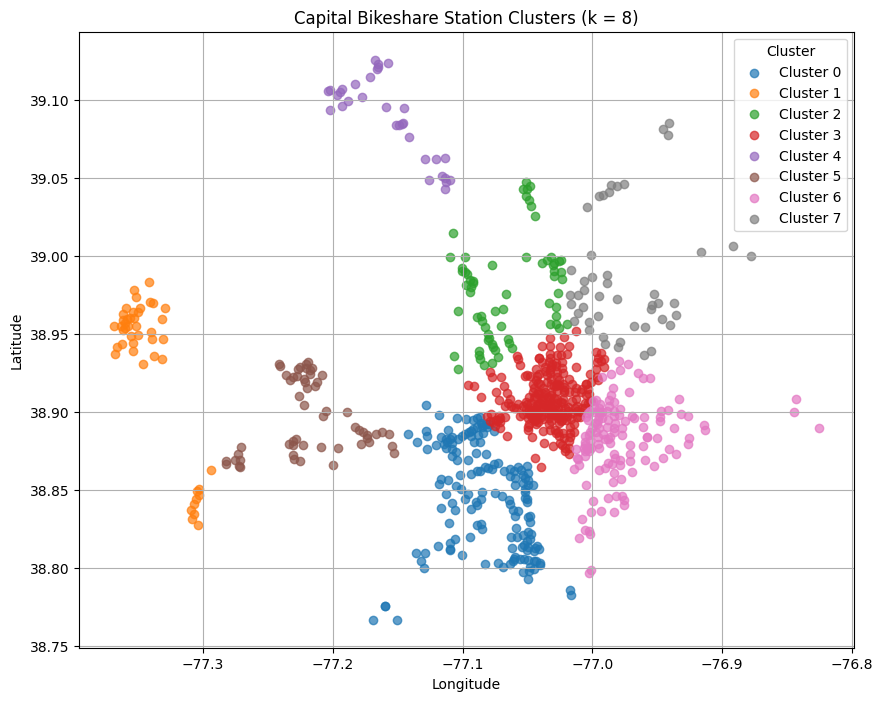

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Set the optimal number of clusters from Task 2
k_star = 8

# Run K-means clustering
kmeans_final = KMeans(n_clusters=k_star, random_state=42, n_init='auto')
Stations['Cluster'] = kmeans_final.fit_predict(Stations[['Latitude', 'Longitude']])

# Plot the clustered stations
plt.figure(figsize=(10, 8))
for cluster in range(k_star):
    cluster_data = Stations[Stations['Cluster'] == cluster]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster}', alpha=0.7)

plt.title(f'Capital Bikeshare Station Clusters (k = {k_star})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## <font color="red"> Task 4: </font>  As discussed in class, the objective function in k-means clustering may not be appropriate. If we want to minimize the total distance, the crew visits bike stations from the center. Instead, we will use k-median clustering that considers Manhattan distance.  Please find the $k^*$ clusters using k-median clustering and visualize them. [10 pts]

Answer:

In [12]:
# !pip install pyclustering

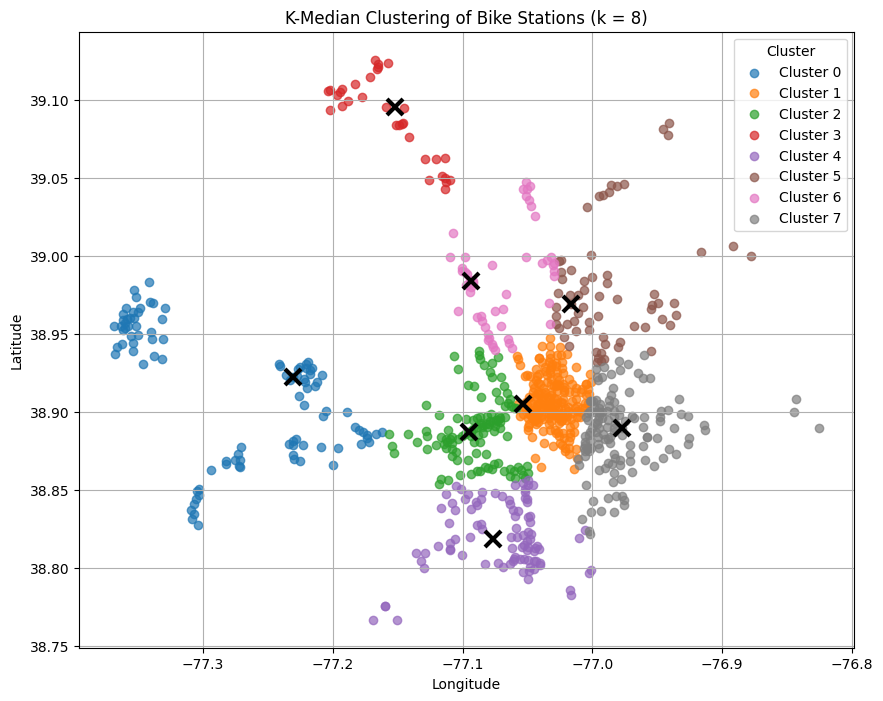

In [13]:
from pyclustering.cluster.kmedians import kmedians
import matplotlib.pyplot as plt
import numpy as np
import random

# Prepare data
X = Stations[['Latitude', 'Longitude']].values.tolist()
k_star = 8  # Based on Task 2 elbow method

# Manually initialize random centers (avoiding numpy.warnings error)
random.seed(42)
initial_indices = random.sample(range(len(X)), k_star)
initial_centers = [X[i] for i in initial_indices]

# Run K-Median clustering
kmedians_instance = kmedians(X, initial_centers)
kmedians_instance.process()

# Get clustering results
clusters = kmedians_instance.get_clusters()
centers = kmedians_instance.get_medians()

# Assign cluster labels
cluster_labels = np.zeros(len(X))
for cluster_id, cluster_points in enumerate(clusters):
    for index in cluster_points:
        cluster_labels[index] = cluster_id

Stations['KMedian_Cluster'] = cluster_labels.astype(int)

# Plot the clusters
plt.figure(figsize=(10, 8))
for cluster_id in range(k_star):
    cluster_data = Stations[Stations['KMedian_Cluster'] == cluster_id]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster_id}', alpha=0.7)

# Plot median centers (black Xs)
for center in centers:
    plt.plot(center[1], center[0], 'kx', markersize=12, markeredgewidth=3)

plt.title(f'K-Median Clustering of Bike Stations (k = {k_star})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## <font color="red"> Task 5: </font>  If BlueBike wants to setup a depot for each crew member at a selected bike station, we can conduct k-medoids clustering to identify the centers and recommend them as the depots. Please identify the $k^*$ clusters and their centers from k-medoids clustering and visualize them. [10 pts]

Answer:

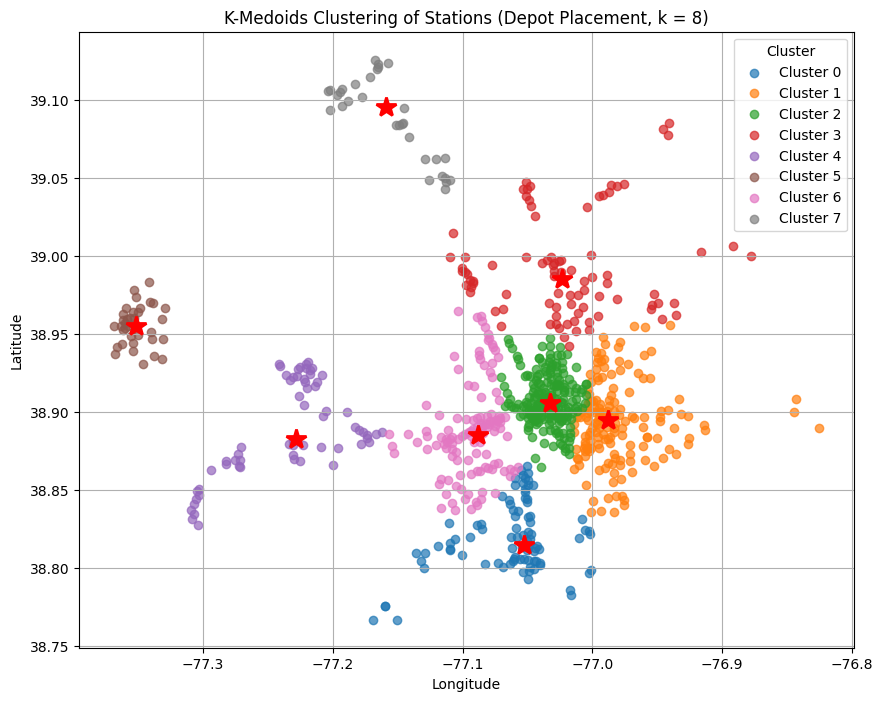

Recommended depot station names (medoids):
                                 start_station_name   Latitude  Longitude
265                         Braddock Rd Metro North  38.814577 -77.052808
31                                   13th & D St NE  38.894832 -76.987633
700                                   Thomas Circle  38.905900 -77.032500
367                       Fenton St & New York Ave   38.985404 -77.023082
337                               Dunn Loring Metro  38.882800 -77.228300
735     W&OD Trail/Sunset Hills Rd & Old Reston Ave  38.955022 -77.351524
254                           Barton St & 10th St N  38.884961 -77.087770
519  Montgomery College / W Campus Dr & Mannakee St  39.095661 -77.159048


In [15]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils.metric import distance_metric, type_metric
import numpy as np
import matplotlib.pyplot as plt
import random

# Prepare data
X = Stations[['Latitude', 'Longitude']].values.tolist()
k_star = 8  # Based on elbow method

# Manhattan distance metric (good for grid-like street layouts)
manhattan_metric = distance_metric(type_metric.MANHATTAN)

# Manually choose k_star unique indices for medoid initialization
random.seed(42)
initial_medoids_idx = random.sample(range(len(X)), k_star)

# Run K-Medoids
kmedoids_instance = kmedoids(data=X, initial_index_medoids=initial_medoids_idx, metric=manhattan_metric)
kmedoids_instance.process()

# Get clustering results
clusters = kmedoids_instance.get_clusters()
medoid_indices = kmedoids_instance.get_medoids()

# Assign cluster labels
cluster_labels = np.zeros(len(X))
for cluster_id, cluster_points in enumerate(clusters):
    for idx in cluster_points:
        cluster_labels[idx] = cluster_id

Stations['KMedoids_Cluster'] = cluster_labels.astype(int)

# Plot the clusters
plt.figure(figsize=(10, 8))
for cluster_id in range(k_star):
    cluster_data = Stations[Stations['KMedoids_Cluster'] == cluster_id]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster_id}', alpha=0.7)

# Plot depot locations (medoids) as red stars
for idx in medoid_indices:
    depot = X[idx]
    plt.plot(depot[1], depot[0], 'r*', markersize=15, markeredgewidth=2)

plt.title(f'K-Medoids Clustering of Stations (Depot Placement, k = {k_star})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Print recommended depot stations
print("Recommended depot station names (medoids):")
print(Stations.iloc[medoid_indices][['start_station_name', 'Latitude', 'Longitude']])

## <font color="red"> Task 6: </font>  Conduct hierarchical clustering to generate the $k^*$ clusters and visualize them. [10 pts]

Answer:

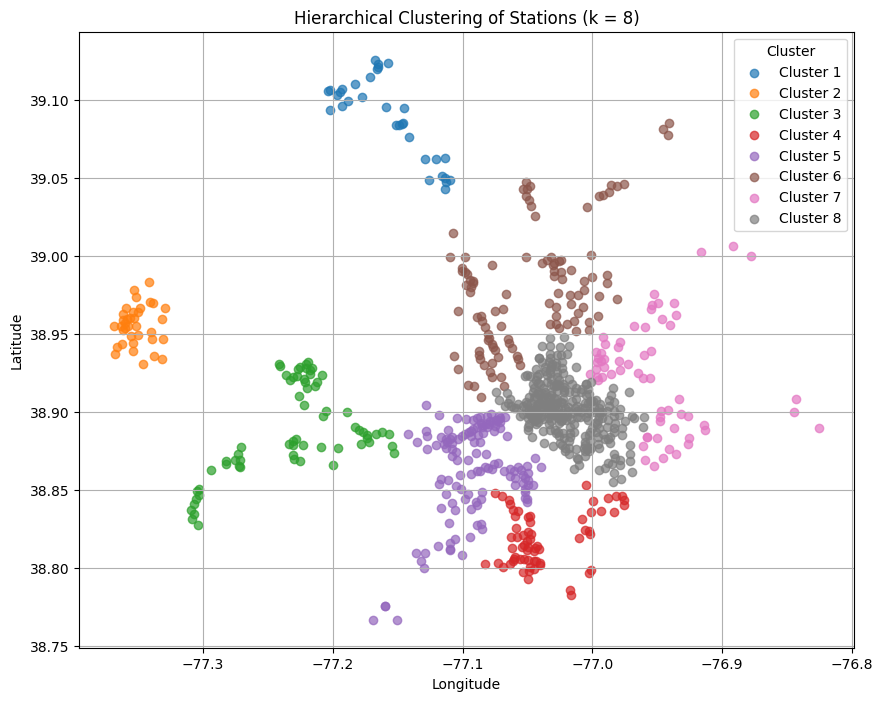

In [16]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
X = Stations[['Latitude', 'Longitude']].values
k_star = 8  # Based on elbow method

# Perform hierarchical clustering using Ward's method
Z = linkage(X, method='ward')

# Assign cluster labels based on k_star
hierarchical_labels = fcluster(Z, k_star, criterion='maxclust')
Stations['Hierarchical_Cluster'] = hierarchical_labels

# Plot the clusters
plt.figure(figsize=(10, 8))
for cluster_id in range(1, k_star + 1):
    cluster_data = Stations[Stations['Hierarchical_Cluster'] == cluster_id]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster_id}', alpha=0.7)

plt.title(f'Hierarchical Clustering of Stations (k = {k_star})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## <font color="red"> Task 7: </font>  Based on the previous results from the four types of clustering methods, briefly discuss your observations about the difference in their clustering patterns. [10 pts]

Answer:

In analyzing the Capital Bikeshare stations using four different clustering techniques—K-Means, K-Median, K-Medoids, and Hierarchical Clustering—distinct patterns and operational implications emerge. K-Means clustering, which minimizes Euclidean distance to centroids, produces compact, spherical clusters but does not necessarily account for actual station locations or urban constraints like road grids. K-Median clustering, by contrast, uses Manhattan distance and centers clusters around coordinate-wise medians, offering more realistic grouping in city environments while remaining robust to outliers. K-Medoids clustering is particularly effective for operational logistics, as it identifies actual bike stations as cluster centers (medoids), making it ideal for suggesting depot locations for rebalancing, repairs, or crew dispatch. Finally, Hierarchical clustering reveals multi-scale spatial relationships by building a tree of nested clusters, but its flat-cut clustering (at k = 8) may result in uneven cluster shapes and sizes. Each method has its strengths: K-Means and K-Median for efficiency, K-Medoids for actionable planning, and Hierarchical for interpretability across scales. Overall, the choice of method should align with operational goals—whether optimizing routes, assigning crews, or establishing depots.

## <font color="red"> Task 8: </font>  If you were the system planner, briefly discuss how you would like to evaluate these plans and decide on the clustering for crew deployment, from a practical point of view. [10 pts]

Answer:

As a system planner, evaluating clustering strategies for crew deployment would require balancing operational efficiency, practical constraints, and scalability. Beyond mathematical compactness or inertia metrics, I would assess each clustering method based on its alignment with the city's road network, travel time between stations, and the distribution of bike demand or incidents across clusters. K-Medoids stands out as the most practical option, as it selects actual stations as cluster centers, making depot planning and daily crew routing more straightforward. I would also consider factors such as crew workload balance, ensuring clusters are equitable in terms of the number of stations and expected maintenance load. K-Median could be a strong secondary option due to its robustness to outliers and suitability for grid-like city layouts. While K-Means is efficient computationally, its reliance on abstract centroids and Euclidean distance makes it less interpretable for deployment. Hierarchical clustering could be useful during initial planning phases to understand spatial hierarchies or when flexibility in the number of crews is needed. Ultimately, I would validate any clustering solution through real-world simulation, incorporating travel times, station demand data, and resource availability to decide the best deployment strategy for maximum coverage and responsiveness.